## Contents <a id='top'></a>

1. <a href=#exploring>Exploring Time Series Data</a> 
2. <a href=#decomposing>Decomposing Time Series</a>
3. <a href=#basic>Basic, ARIMA, and ETS forecasts</a>
4. <a href=#references>References and Summary</a>

<hr>

<a id='exploring'></a>
### 1. Exploring Time Series Data 
<a href=#top>(back to top)</a>

One of the first things that we do when we are given a time series is visualise it. The visualisation is meant to give us an indication of what kinds of techniques would be suitable for forecasting it. In this section, we shall learn several methods to visualise a time series dataset. 

When we visualise a time series, we look out for the following features:    
1. **Trend**: A trend exists when there is a long-term increase or decrease in the data.
2. **Level**: The level of a series refers to its height on the ordinate axis.
3. **Seasonal**: A seasonal pattern exists when a series is influenced by factors such as quarters of the year, the month, the day of the week, or time of day. Seasonality is always of a **fixed and known** period.
4. **Cyclic**: A cyclic pattern exists when there are rises and falls that are not of a fixed period. 

In [1]:
import pandas as pd
import numpy as np
import datetime, calendar
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import acf

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'figure.figsize': (12, 5)})

In [2]:
hsales = pd.read_csv('../data/hsales.csv', parse_dates=[0])
hsales.head()

,date,hsales
0,1973-01-01,55
1,1973-02-01,60
2,1973-03-01,68
3,1973-04-01,63
4,1973-05-01,65


In [3]:
hsales.set_index('date', inplace=True)
hsales.head()

,hsales
date,
1973-01-01,55
1973-02-01,60
1973-03-01,68
1973-04-01,63
1973-05-01,65


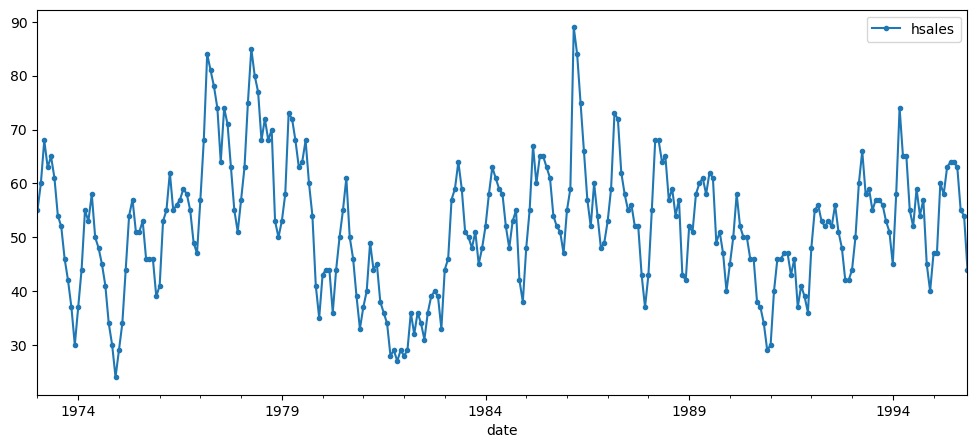

In [4]:
hsales.plot(marker='o', ms=3);

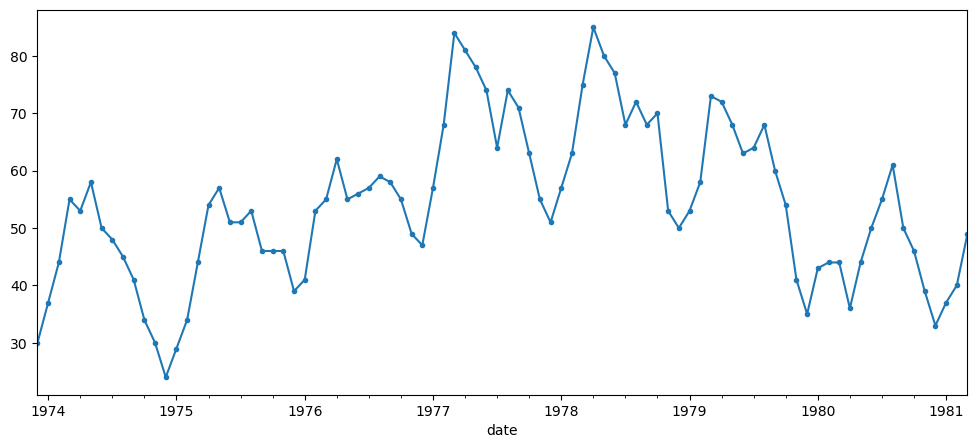

In [5]:
#hsales['1973-02-20':'1973-12-31'].plot(marker='o', ms=3, legend=False);
#hsales['1973':'1981'].plot(marker='o', ms=3, legend=False);
hsales['1973-12':'1981-03'].plot(marker='o', ms=3, legend=False);

In [6]:
hsales.index

DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01',
               ...
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01', '1995-08-01', '1995-09-01',
               '1995-10-01', '1995-11-01'],
              dtype='datetime64[ns]', name='date', length=275, freq=None)

In [7]:
hsales.index.freq = 'MS'
hsales.index

DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01',
               ...
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01', '1995-08-01', '1995-09-01',
               '1995-10-01', '1995-11-01'],
              dtype='datetime64[ns]', name='date', length=275, freq='MS')

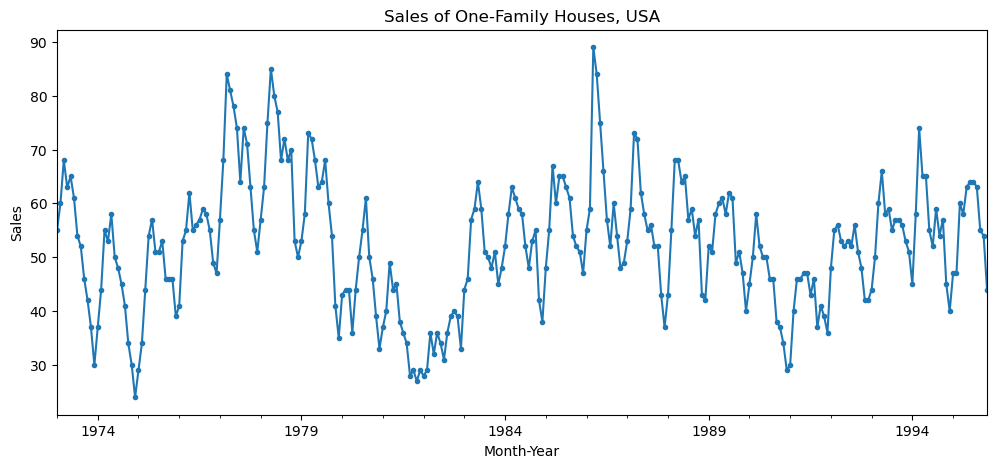

In [8]:
hsales.plot(title='Sales of One-Family Houses, USA', marker='o', ms=3, legend=False)
plt.xlabel('Month-Year'); plt.ylabel('Sales');

We observe a strong seasonality within each year. There is some indication of cyclic behaviour every 6&ndash;10 years. There is no apparent monotonic trend over this period. With pandas objects, we can resample the series. This allows us to compute summaries over time windows that could be of business importance. For instance, we might be interested in a breakdown by quarters instead of months. 

With the `resample()` function, we can perform both downsampling (reducing the frequency of observations) or upsampling (via interpolation or nearest neighbour imputation).

See the page on [DateOffset objects](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects) for details and options on the strings that you can put within the resample method.

In [9]:
pd.DataFrame.resample?

Signature:
pd.DataFrame.resample(
    self,
    rule,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    closed: "Literal['right', 'left'] | None" = None,
    label: "Literal['right', 'left'] | None" = None,
    convention: "Literal['start', 'end', 's', 'e']" = 'start',
    kind: "Literal['timestamp', 'period'] | None" = None,
    on: 'Level | None' = None,
    level: 'Level | None' = None,
    origin: 'str | TimestampConvertibleTypes' = 'start_day',
    offset: 'TimedeltaConvertibleTypes | None' = None,
    group_keys: 'bool_t' = False,
) -> 'Resampler'
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time series.
The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
series/index to the ``on``/``level`` keyword parameter.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or object representing target conve

In [10]:
hsales.head(15)

,hsales
date,
1973-01-01,55
1973-02-01,60
1973-03-01,68
1973-04-01,63
1973-05-01,65
1973-06-01,61
1973-07-01,54
1973-08-01,52
1973-09-01,46


In [11]:
print(dir(hsales.resample('QS')))

['__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_adjust_binner_for_upsample', '_agg_examples_doc', '_agg_see_also_doc', '_ascending_count', '_attributes', '_constructor', '_convert_obj', '_descending_count', '_dir_additions', '_dir_deletions', '_downsample', '_from_selection', '_get_binner', '_get_binner_for_time', '_get_index', '_get_indices', '_get_resampler_for_grouping', '_gotitem', '_groupby_and_aggregate', '_hidden_attrs', '_indexer', '_infer_selection', '_internal_names', '_internal_names_set', '_is_protocol', '_make_

In [12]:
hsales.resample('QS').sum().head()

,hsales
date,
1973-01-01,183
1973-04-01,189
1973-07-01,152
1973-10-01,109
1974-01-01,136


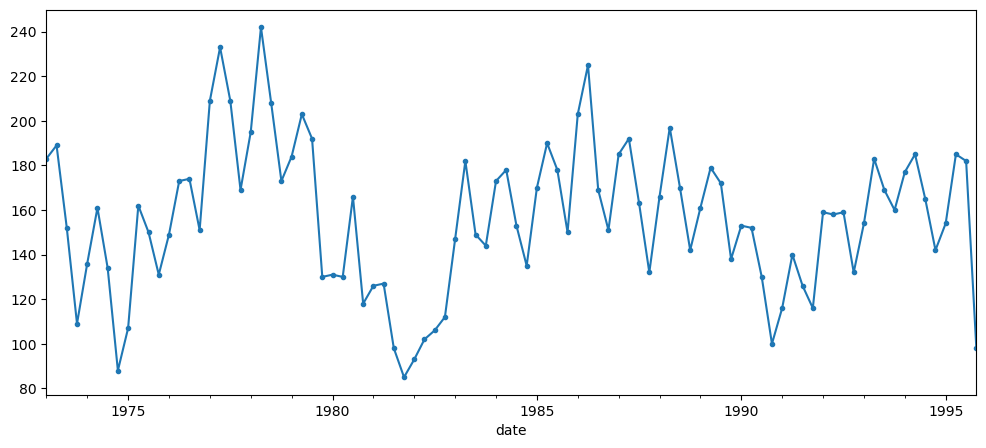

In [13]:
hsales_q = hsales.resample('QS').sum()
hsales_q.plot(marker='o', ms=3, legend=False);

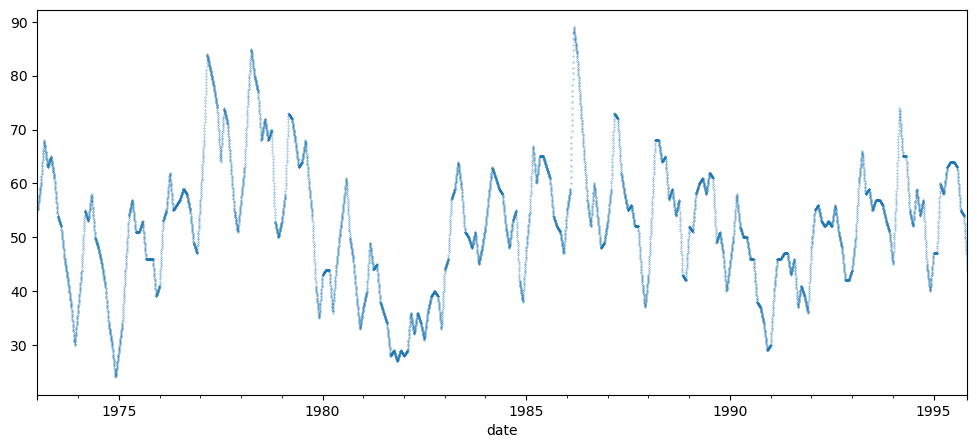

In [14]:
hsales.resample('1D').interpolate().plot(lw=0, marker='o', ms=0.25, legend=False);

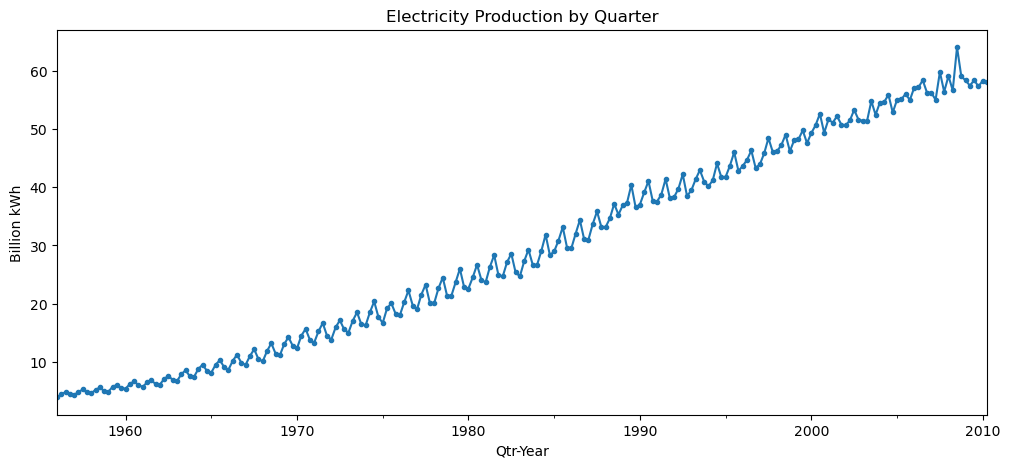

In [15]:
qau = pd.read_csv('../data/qauselec.csv', parse_dates=[0])
qau.set_index('date', inplace=True)
qau.index.freq = 'QS'

qau.plot(title='Electricity Production by Quarter', marker='o', ms=3, legend=False)
plt.xlabel('Qtr-Year'); plt.ylabel('Billion kWh');

There is a strong increasing trend. There is strong seasonality, and there is no evidence of cyclic behaviour.

A season plot allows us to visualise what happens within a season. In this case, each line in the graph below traces the behaviour of the series from the beginning of the season till the end (from Jan to Dec). In general, it looks like there is a peak around Feb to March, after which sales descend until the next January. Using a colour map with colours that we can remember would allow us to identify a trend **across** seasons. In this case, there isn't one, but if you re-do this plot for the Electricity series, you would see a clear association between the colour of line and level of each series within a year.

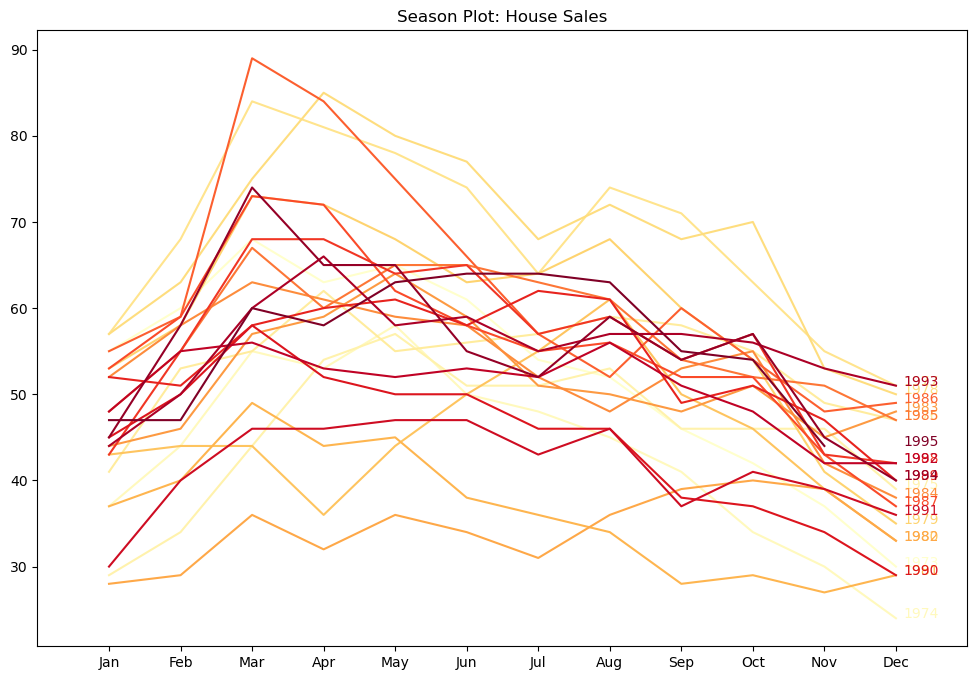

In [16]:
hsales.loc[:, 'year'] = hsales.index.year
hsales.loc[:, 'month'] = hsales.index.month

yrs = np.sort(hsales.year.unique())
color_ids = np.linspace(0, 1, num=len(yrs))
colors_to_use = plt.cm.YlOrRd(color_ids)

plt.figure(figsize=(12, 8))

for i, yr in enumerate(yrs):
    df_tmp = hsales.loc[hsales.year == yr, :]
    plt.plot(df_tmp.month, df_tmp.hsales, color=colors_to_use[i]);
    plt.text(12.1, df_tmp.hsales.iloc[-1], str(yr), color=colors_to_use[i])
plt.title('Season Plot: House Sales')
plt.xlim(0, 13)
plt.xticks(np.arange(1, 13), calendar.month_abbr[1:13]);

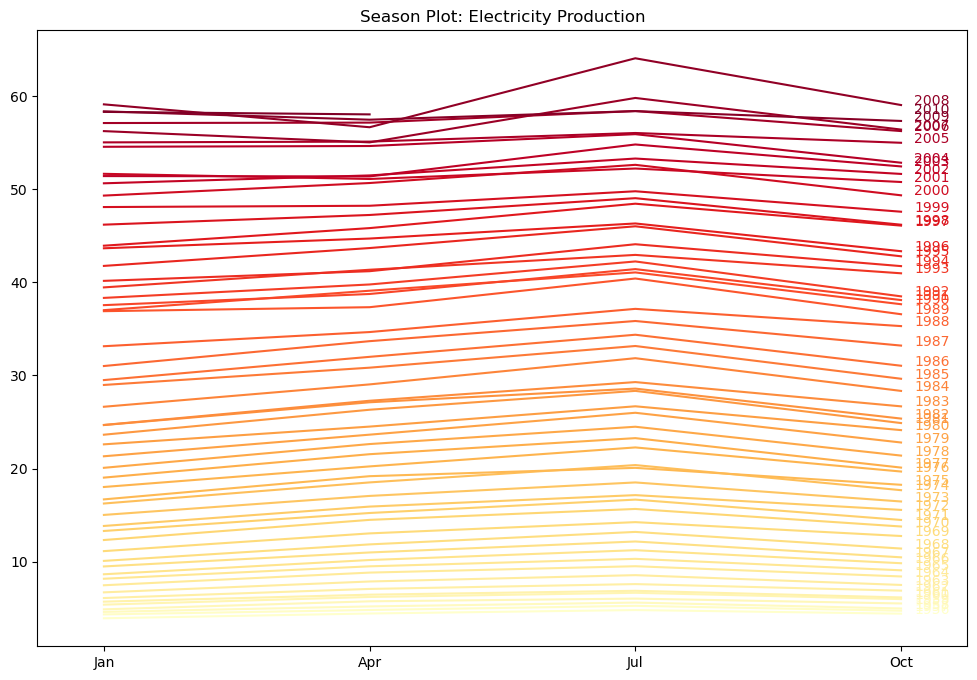

In [17]:
qau.loc[:, 'year'] = qau.index.year
qau.loc[:, 'qtr'] = qau.index.quarter

yrs = np.sort(qau.year.unique())
color_ids = np.linspace(0, 1, num=len(yrs))
colors_to_use = plt.cm.YlOrRd(color_ids)

plt.figure(figsize=(12, 8))

for i, yr in enumerate(yrs):
    df_tmp = qau.loc[qau.year == yr, :]
    plt.plot(df_tmp.qtr, df_tmp.kWh, color=colors_to_use[i]);
    plt.text(4.05, df_tmp.kWh.iloc[-1], str(yr), color=colors_to_use[i])
plt.title('Season Plot: Electricity Production')
plt.xlim(0.75, 4.25)
plt.xticks(np.arange(1, 5), calendar.month_abbr[1:13:3]);

Most time series models are autoregressive in nature. This means that they attempt to predict future observations based on previous ones. The observations from the past could be from the time series that we are interested in, or they could be from other time series that we believe are related.

When beginning with model fitting, we would want to have some idea about the extent to which past observations affect the current one. In other words, how many of the past observations should we include when forecasting new observations? Lag plots and autocorrelation functions (acf) are the tools that we use to answer this question.

If we denote the observation of a time series as $y_t$, then a lag plot at lag $k, k > 0$ is a scatter plot of $y_t$ against $y_{t-k}$. It allows us to visually assess if the observations that are $k$ units of time apart are associated with one another. We typically plot several lags at once to observe this relationship.

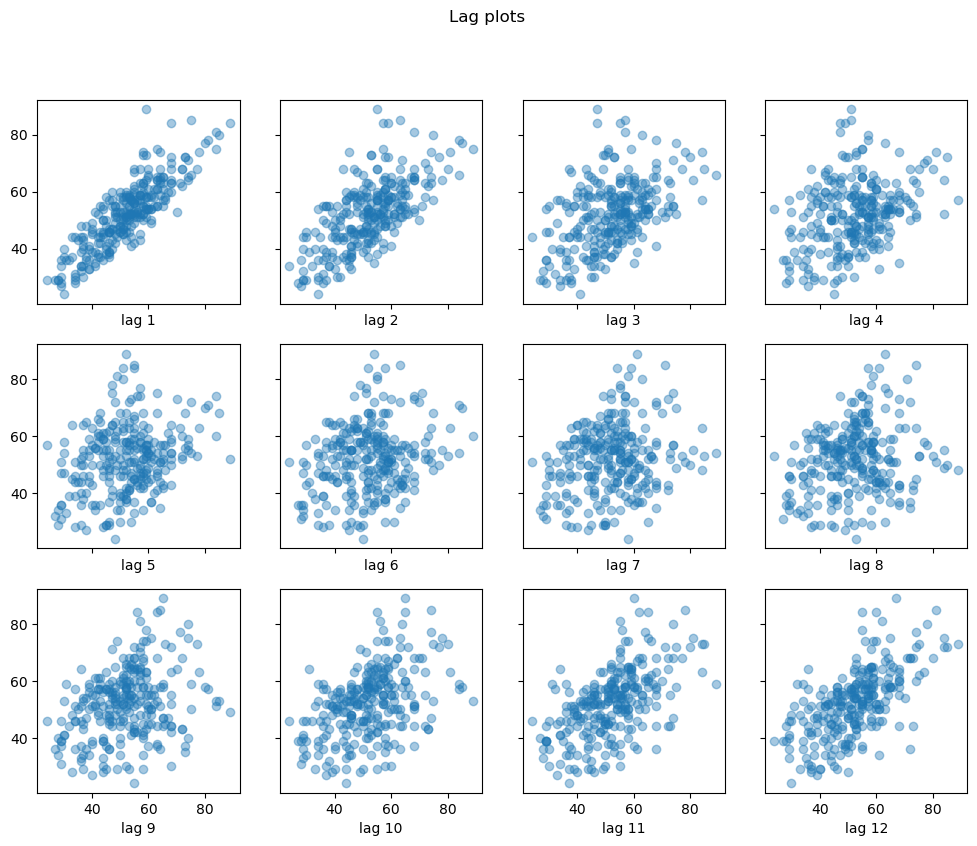

In [18]:
f, aa = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True)
f.set_figheight(9)
f.set_figwidth(12)

y = hsales.hsales.values
for i in np.arange(0, 3):
    for j in np.arange(0, 4):
        lag = i*4 + j + 1
        aa[i,j].scatter(y[:-lag], y[lag:], alpha=0.4)
        aa[i,j].set_xlabel("lag " + str(lag))
f.suptitle('Lag plots');

<a id='decomposing'></a>
### 2. Decomposing Time Series Data 
<a href=#top>(back to top)</a>

In this section, our goal is still primarily exploratory, but it will also return information that we can use to model our data later on. We aim to break the time series readings into:
* a trend-cycle component,
* a seasonality component, and
* a remainder component.

If we can forecast these components individually, we can combine them to provide forecasts for the original series. There are two basic methods of decomposition into the above components: an additive one, and a multiplicative one. In the additive decomposition, we assume that they contribute in an additive manner to $y_t$:
\begin{equation}
y_t = T_t + S_t + R_t
\end{equation}

In the multiplicative decomposition, we assume the following relationship holds:
\begin{equation}
y_t = T_t \times S_t \times R_t
\end{equation}

When we are in the multiplicative case, we sometimes apply the logarithm transform to the data, which returns to an additive model:
\begin{equation}
\log y_t = \log T_t + \log S_t + \log R_t
\end{equation}

A typical algorithm to decompose time series data would work like this:

Estimated version always comes with a hat

1. Estimate the trend component. Let us call it $\hat{T}_t$.
2. Obtain the de-trended data $y_t - \hat{T}_t$ or $y_t / \hat{T}_t$ as appropriate.
3. Estimate the seasonal component. For instance, we could simply average the values in each month. 
Let us denote this estimate as $\hat{S}_t$.
4. Estimate the remainder component. For instance, in the additive model, it would be 
$\hat{R}_t = y_t - \hat{T}_t - \hat{S}_t$.

Here is the naive additive decomposition of the housing sales data.

# How is a trend calculated?   
Likely a moving window (moving average)  
Why is the trend moving up and down as well?  

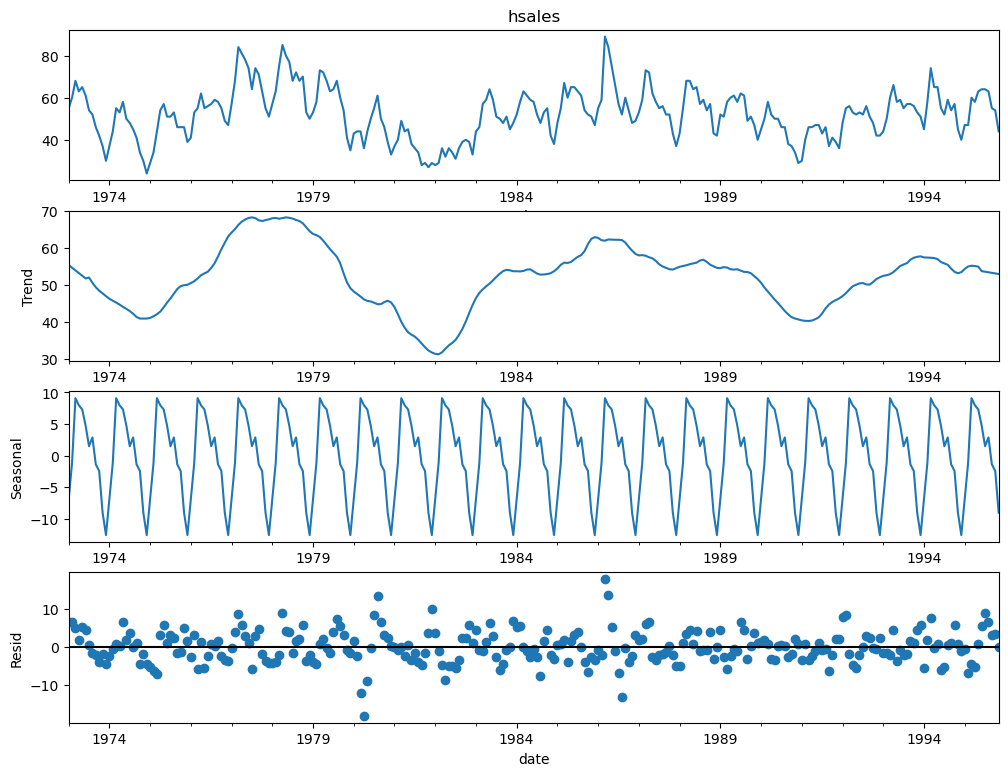

In [19]:
hsales_add = seasonal_decompose(hsales.loc[:, 'hsales'], model='additive', extrapolate_trend='freq')
#hsales_add.plot();
fig, (ax0,ax1,ax2,ax3) = plt.subplots(4, 1, figsize=(12, 9))
hsales_add.observed.plot(ax=ax0); ax0.title.set_text('hsales');
hsales_add.trend.plot(ax=ax1); ax1.set_ylabel('Trend');
hsales_add.seasonal.plot(ax=ax2); ax2.set_ylabel('Seasonal');
hsales_add.resid.plot(ax=ax3, lw=0, marker="o"); ax3.axhline(y=0, color='black'); ax3.set_ylabel('Resid');

For strongly trended data, the seasonally adjusted data $T_t + R_t$ should have much more variation than the remainder component $R_t$. Therefore $\operatorname{Var}(R_t)/\operatorname{Var}(T_t + R_t)$ should be relatively small. But for data with little or no trend, the two variances should be approximately the same. So the strength of trend is defined as
\begin{equation}
F_T = \max\left\{0, 1 - \frac{\operatorname{Var}(R_t)}{\operatorname{Var}(T_t + R_t)}\right\}.
\end{equation}

$F_T$ nearer to 1 means a strong trend!

Similarly, the strength of seasonality is defined as
\begin{equation}
F_S = \max\left\{0, 1 - \frac{\operatorname{Var}(R_t)}{\operatorname{Var}(S_t + R_t)}\right\}.
\end{equation}
A series with seasonal strength $F_S$ close to 0 exhibits almost no seasonality, while a series with strong seasonality will have $F_S$ close to 1 because $\operatorname{Var}(R_t)$ will be much smaller than $\operatorname{Var}(S_t + R_t)$.

In [20]:
vr = hsales_add.resid.var()
vtr = (hsales_add.trend + hsales_add.resid).var()
vsr = (hsales_add.seasonal + hsales_add.resid).var()
[1 - vr/vtr, 1 - vr/vsr]

[0.8102666497378245, 0.7020373504491384]

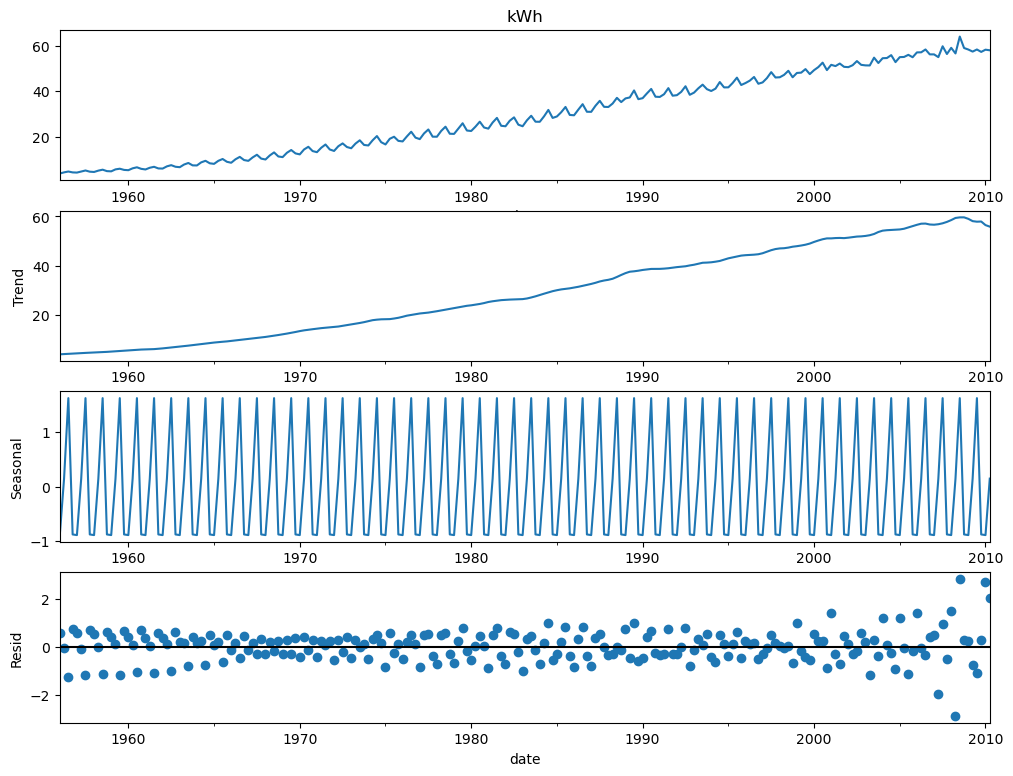

In [21]:
qau_add = seasonal_decompose(qau.loc[:, 'kWh'], model='additive', extrapolate_trend='freq')
#qau_add.plot();
fig, (ax0,ax1,ax2,ax3) = plt.subplots(4, 1, figsize=(12, 9))
qau_add.observed.plot(ax=ax0); ax0.title.set_text('kWh');
qau_add.trend.plot(ax=ax1); ax1.set_ylabel('Trend');
qau_add.seasonal.plot(ax=ax2); ax2.set_ylabel('Seasonal');
qau_add.resid.plot(ax=ax3, lw=0, marker="o"); ax3.axhline(y=0, color='black'); ax3.set_ylabel('Resid');

In [22]:
vr = qau_add.resid.var()
vtr = (qau_add.trend + qau_add.resid).var()
vsr = (qau_add.seasonal + qau_add.resid).var()
[1 - vr/vtr, 1 - vr/vsr]

[0.9985944006524957, 0.7051404597699338]

The returned object contains the trend, seasonal and remainder components as individual pandas series, which we can work on further.

As you may have noticed, there are some issues with the classical seasonal decomposition algorithms. These include:
* an inability to estimate the trend at the ends of the series.  (There's wrap around effect)    
* an inability to account for changing seasonal components. (Seasonality doesn't change over time)    
* it is not robust to outliers.

Newer algorithms such as STL decomposition, X11 and others attempt to address these issues. They use locally weighted regression models to obtain the trend. These algorithms iterate over the time series several times, so as to ensure that outliers are not affecting the outcome.

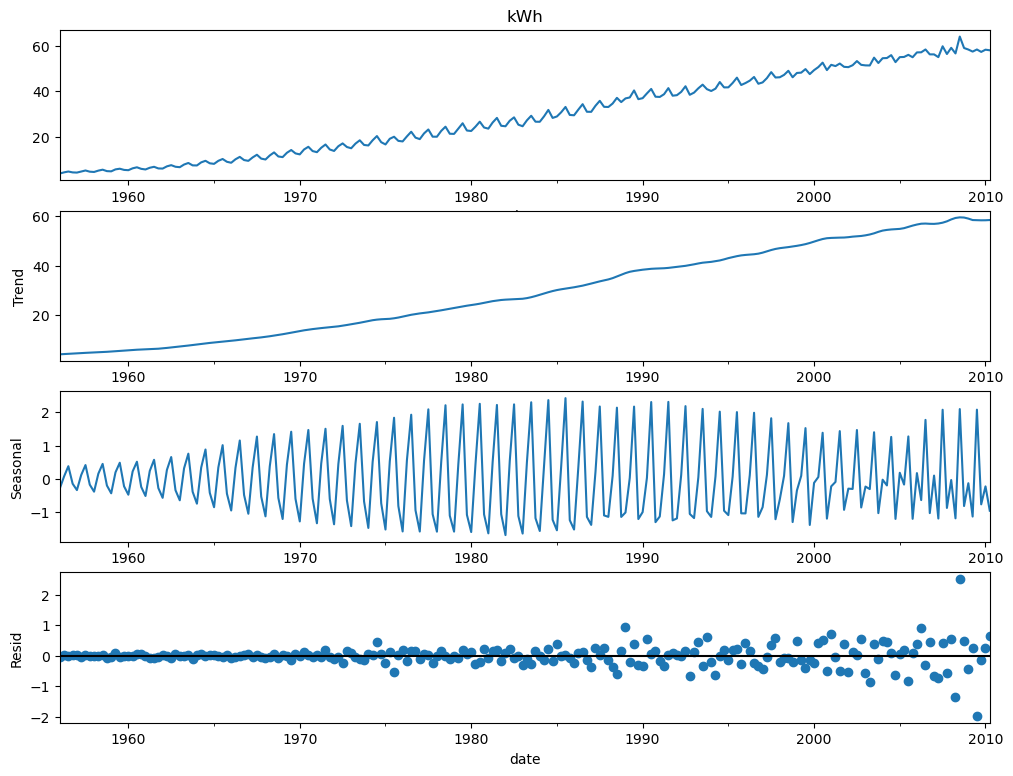

In [23]:
qau_stl = STL(qau.kWh).fit()
#qau_stl.plot();
fig, (ax0,ax1,ax2,ax3) = plt.subplots(4, 1, figsize=(12, 9))
qau_stl.observed.plot(ax=ax0); ax0.title.set_text('kWh');
qau_stl.trend.plot(ax=ax1); ax1.set_ylabel('Trend');
qau_stl.seasonal.plot(ax=ax2); ax2.set_ylabel('Seasonal');
qau_stl.resid.plot(ax=ax3, lw=0, marker="o"); ax3.axhline(y=0, color='black'); ax3.set_ylabel('Resid');

A smoother is used here, so it is likely that it computes the trend/ MA using a weighted gussian function.  

<a id='basic'></a>
### 3. Basic, ARIMA and ETS forecasts 
<a href=#top>(back to top)</a>

In [24]:
from myscripts import ts

As in all forecasting methods, it is useful to obtain a baseline forecast before proceeding to more sophisticated techniques. Baseline forecasts are usually obtained from simple, intuitive methods. Here are some such methods:

    A. The simple mean forecast:  
\begin{equation}
\hat{y}_{T+h | T} = \frac{y_1 + y_2 + y_3 + \cdots + y_T}{T}
\end{equation}


rmb, hat == estimates  
T+h given t ==> have observed data uptill time T, trying to predict h steps ahead.  

    B. The naive forecast:
\begin{equation}
\hat{y}_{T+h | T} = y_T
\end{equation}

    C. The seasonal naive forecast.
    
Suppose we apply some of the above forecasts to the housing sales dataset. We withhold the most recent 2 years of data and foreacst those. Here is a plot depicting the forecasts, and the true values.

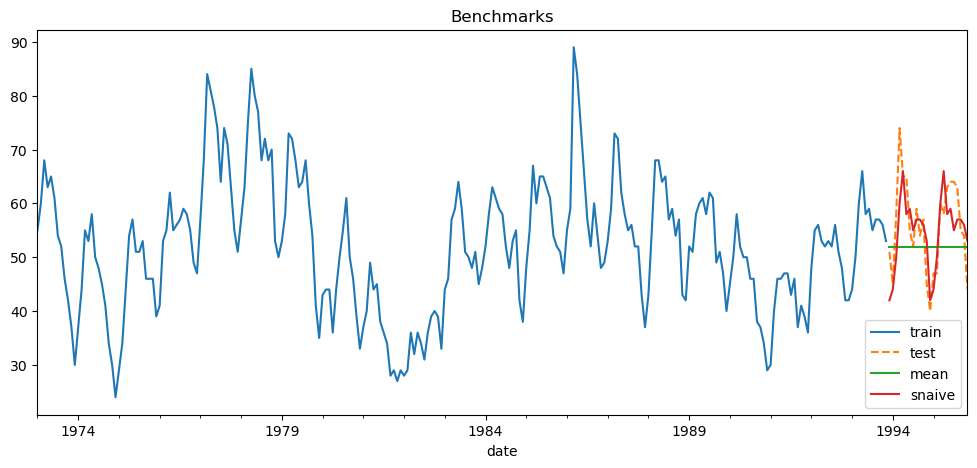

In [25]:
# Set aside the last two years as the test set.
#hsales = hsales.drop(columns=['year', 'month'])
train_set = hsales.iloc[:-24,]
test_set = hsales.iloc[-24:, ]

# Obtain the forecast from the training set
mean_forecast = ts.meanf(train_set.hsales, 24)
snaive_forecast = ts.snaive(train_set.hsales, 24, 12)

# Plot the predictions and true values
ax = train_set.hsales.plot(title='Benchmarks', legend=False)
test_set.hsales.plot(ax=ax, legend=False, style='--')
mean_forecast.plot(ax=ax, legend=False, style='-')
snaive_forecast.plot(ax=ax, legend=False, style='-')
plt.legend(labels=['train', 'test', 'mean', 'snaive'], loc='lower right');

When assessing forecasts, there are a few different metrics that are typically applied. Each of them has it's own set of pros and cons. If we denote the predicted value with $\hat{y}_t$, then these are the formulas for three of the most common error metrics used in time series forecasting

    A. Root Mean Square Error (RMSE): 
\begin{equation}
\sqrt{\frac{1}{h} \sum_{i=1}^h (y_{t+i} - \hat{y}_{t+i})^2 }
\end{equation}

    B. Mean Absolute Error (MAE):
\begin{equation}
\frac{1}{h} \sum_{i=1}^h |y_{t+i} - \hat{y}_{t+i}|
\end{equation}
    
    C. Symmetric Mean Absolute Percentage Error (MAPE):
\begin{equation}
\frac{1}{h} \sum_{i=1}^h \frac{2 \times |y_{t+i} - \hat{y}_{t+i}|}{y_{t+i} +\hat{y}_{t+i}}
\end{equation}

The RMSE and MAE are scale dependent errors. It is difficult to compare the errors across, or to aggregate errors across different time series with it. Due to the square in the formula, the RMSE is quite sensitive to outliers. The MAE is more robust to outliers. The symmetric MAPE is a scaled error; it is a modification of the usual percentage error. The modification is necessary because the usual percentage error favours over prediction to underprediction.

In [26]:
for x in [ts.rmse, ts.mae, ts.smape]:
    print('{0},mean: {1:.3f}'.format(x.__name__, x(test_set.hsales.values, mean_forecast.values)))
    print('{0},snaive: {1:.3f}'.format(x.__name__, x(test_set.hsales.values, snaive_forecast.values)))
    print('---')

rmse,mean: 9.023
rmse,snaive: 5.906
---
mae,mean: 7.562
mae,snaive: 4.792
---
smape,mean: 0.138
smape,snaive: 0.087
---


In our simple example, the seasonal naive model outperforms the simple mean forecast according to all the metrics. Decisions are not always this clear-cut.

Now let us turn to a huge class of models that have been utilised in time series forecasting since the 1960's. They are known as ARIMA models. ARIMA stands for AutoRegressive Integrated Moving Average models. These models are appropriate for **stationary** processes. Stationarity is a technical term that refers to processes 

If the data is not stationary, you can differenciate it/ differencing.  
However, only do differencing 2 times max.  
Stationary trend ==> fluctuate up and down around the same level for the trend.  
Stationary time series ==> constant means  

* that have a constant mean. This means that the process merely fluctuates about a fixed level over time.
* whose covariance function does not change over time. This means that, for a fixed $h$, the covariance between $y_t$ 
  and $y_{t+h}$ is the same for all $t$.
* whose variance is constant over time.

How can we tell if a process is stationary or not? The following time series is not stationary. Why?

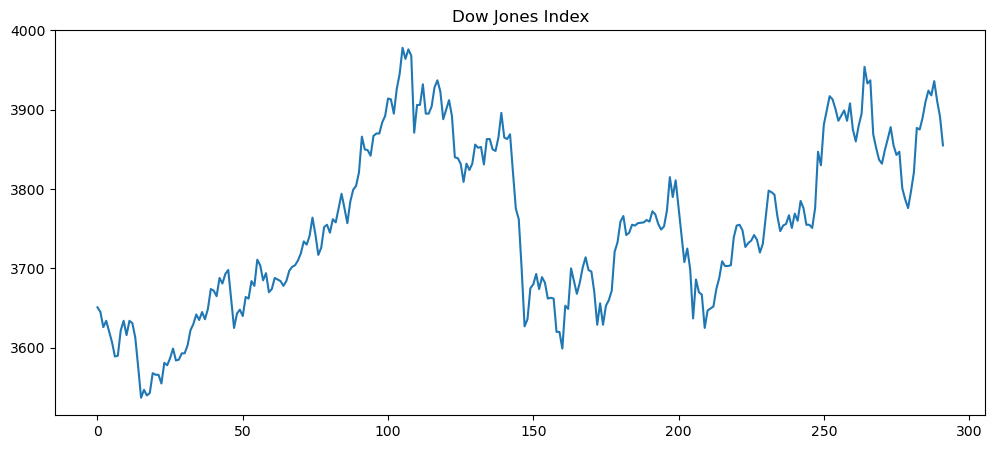

In [27]:
dj = pd.read_csv('../data/dj.csv')
dj.plot(legend=False, title='Dow Jones Index');

However, the following differenced version of the same series is:
\begin{equation}
\Delta y_t = y_t - y_{t-1}
\end{equation}

This is differencing   
At mnost do a differencing 2 times.  
This is to massage the data into stationary data.  

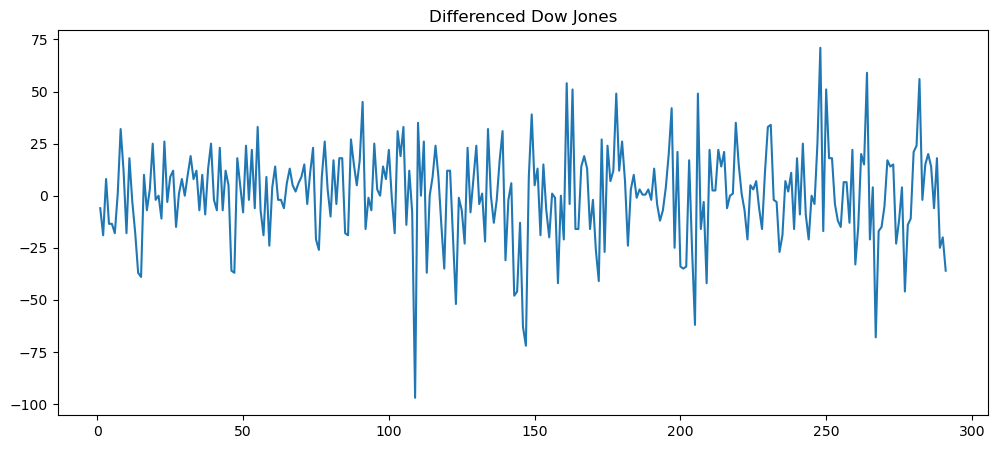

In [28]:
ddj = diff(dj)
ddj.plot(legend=False, title='Differenced Dow Jones');

ARIMA models revolve around the idea that if we have a non-stationary series, we can transform it into a stationary one with a suitable number of differencing. A more general way of studying if a series is stationary is to plot it's AutoCorrelation Function (ACF). The ARIMA method directly models the ACF. That is why it is so important for this class of models. The ACF of a stationary process should "die down" quickly. Here is the ACF of the Dow Jones data, before and after differencing.

Commented out line find the acf with 0 lag.  
Correlation with itself.  
This is worthless as 0 lag's 1 is dominating the entire plot. 
top is original DJ index.  
It is a slowly decaying auto correlation.  
Differenced value at the bottom is showing very small auto correlations when differenced.  

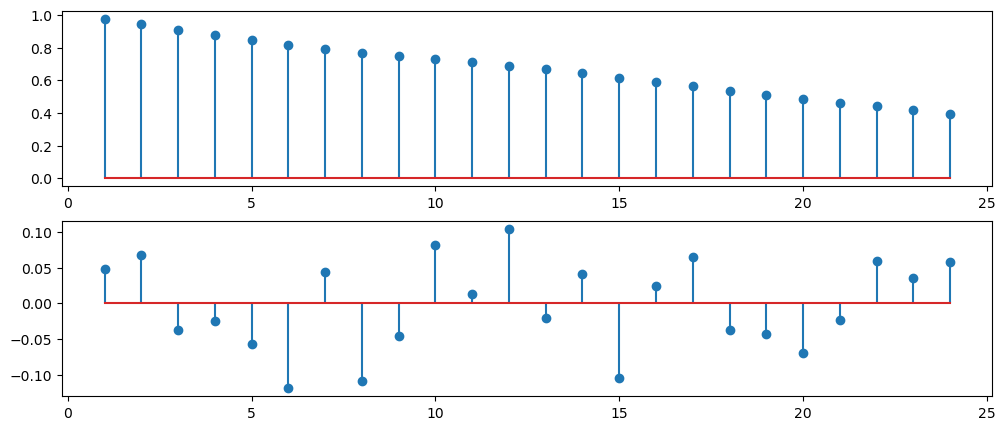

In [29]:
plt.subplot(211)
#plt.stem(acf(dj, fft=False), use_line_collection=True)
dj_acf = acf(dj, fft=False)
plt.stem(np.arange(1, len(dj_acf)), dj_acf[1:])
plt.subplot(212)
#plt.stem(acf(ddj, fft=False));
ddj_acf = acf(ddj, fft=False)
plt.stem(np.arange(1, len(ddj_acf)), ddj_acf[1:]);

This plot shows that the decomposition didn't do a job as good as it should have down given there are still some large autocorrelation left.  

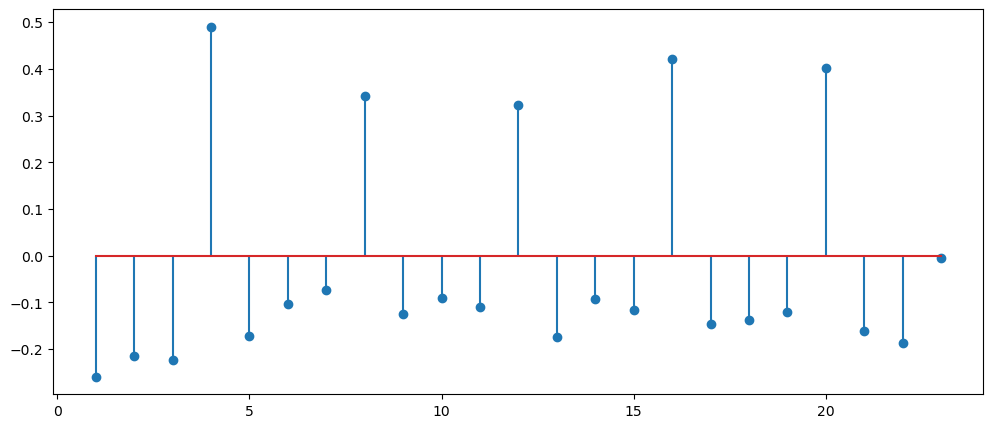

In [30]:
#plt.stem(acf(qau_add.resid, fft=False));
qau_add_resid_acf = acf(qau_add.resid, fft=False)
plt.stem(np.arange(1, len(qau_add_resid_acf)), qau_add_resid_acf[1:]);

Now suppose that, starting from our original series $y_t$, we difference it a sufficient number of times and obtain a stationary series. Let's call this $y'_t$. The ARIMA model assumes that 

\begin{equation}
y'_t = c + \phi_1 y'_{t-1} + \phi_2 y'_{t-2} + \cdots + \phi_p y'_{t-p} + \theta_1 e_{t-1} + \cdots + \theta_q e_{t-q}
\end{equation}

Autoregressive ==> variables are past values of the same series, constructed in the regression way.  
costant times var 1 lag before all the way to the constant times p lages before.  

Moving average:L
Linear combination of the error term/ residual/ random noise termsa.  

* The $e_j$ correspond to unobserved innovations. They are typically assumed to be independent across time with a common variance.
* The $\phi$ and $\theta$ terms are unknown coefficients to be estimated.
* If $y'_t$ was obtained by performing $d$ successive differencings, then the above ARIMA model is referred to as an $\text{ARIMA}(p,d,q)$ model.

In olden days, the $p$, $d$ and $q$ parameters were picked by the analyst after inspecting the ACF, PACF, and time plots of the differenced series. Today, we can iterate through a large number of them and pick the best according to a well-established criteria (AIC).    
p is the values before to use as signal.   
d is the value to do differencing on.    
q is the number of random signal to use.    

In [31]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pmdarima as pm

Let us try out the ARIMA auto-fitting algorithm on the qau electricity usage dataset. We shall set aside the last three years of data as the test set. Recall that this is quarterly data. First, we establish the seasonal naive benchmark error for this dataset.

In [32]:
train2 = qau.kWh[:-12]
test2 = qau.kWh[-12:]

In [33]:
snaive_f = ts.snaive(train2, 12, 4)

ts.rmse(test2.values, snaive_f.values)

2.5454091517867985

The RMSE is approximately 2.55. Let us see if the ARIMA models can do better than this.

In [34]:
pm.auto_arima?

Signature:
pm.auto_arima(
    y,
    X=None,
    start_p=2,
    d=None,
    start_q=2,
    max_p=5,
    max_d=2,
    max_q=5,
    start_P=1,
    D=None,
    start_Q=1,
    max_P=2,
    max_D=1,
    max_Q=2,
    max_order=5,
    m=1,
    seasonal=True,
    stationary=False,
    information_criterion='aic',
    alpha=0.05,
    test='kpss',
    seasonal_test='ocsb',
    stepwise=True,
    n_jobs=1,
    start_params=None,
    trend=None,
    method='lbfgs',
    maxiter=50,
    offset_test_args=None,
    seasonal_test_args=None,
    suppress_warnings=True,
    error_action='trace',
    trace=False,
    random=False,
    random_state=None,
    n_fits=10,
    return_valid_fits=False,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    with_intercept='auto',
    sarimax_kwargs=None,
    **fit_args,
)
Docstring:
Automatically discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal
parameters for an ``ARIMA`` model, settling o

In [35]:
arima_m1 = pm.auto_arima(train2.values, seasonal=True, m=4, test='adf', suppress_warnings=True)

## Why is my model different???

In [36]:
arima_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  206
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 4)   Log Likelihood                -176.761
Date:                             Tue, 31 Oct 2023   AIC                            363.521
Time:                                     21:04:12   BIC                            380.136
Sample:                                          0   HQIC                           370.241
                                             - 206                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3409      0.055     -6.183      0.000      -0.449      -0.233
ma.L2         -0.2475      0.060     -4.156      0.000      -0.364      -0.131
ar.S.L4        0.9884      0.009    111.844      0.000       0.971       1.006
ma.S.L4       -0.6678      0.051    -13.166      0.000      -0.767      -0.568
sigma2         0.3144      0.025     12.640      0.000       0.266       0.363
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.76
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               9.71   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Once we have found the best-fitting model, we do what we do with any other model in data analytics: we have to inspect the residuals. The residuals should look like trash to us - there should be no clues about the data in them. The standardized residual in the top left should be consistently wide; it isn't. This suggests some sort of transformation of the data before modeling might be appropriate.

The two plots on the off-diagonal are meant for us to assess if the residuals are Normally distributed with mean 0. They do indeed look like it.

The final plot, in the bottom right, displays an ACF with no spikes, indicating that the residuals are uncorrelated. This is precisely what we wished to see.

### ARIMA assumes the error terms (epsilon) are cosntant variance and normally distributed.  

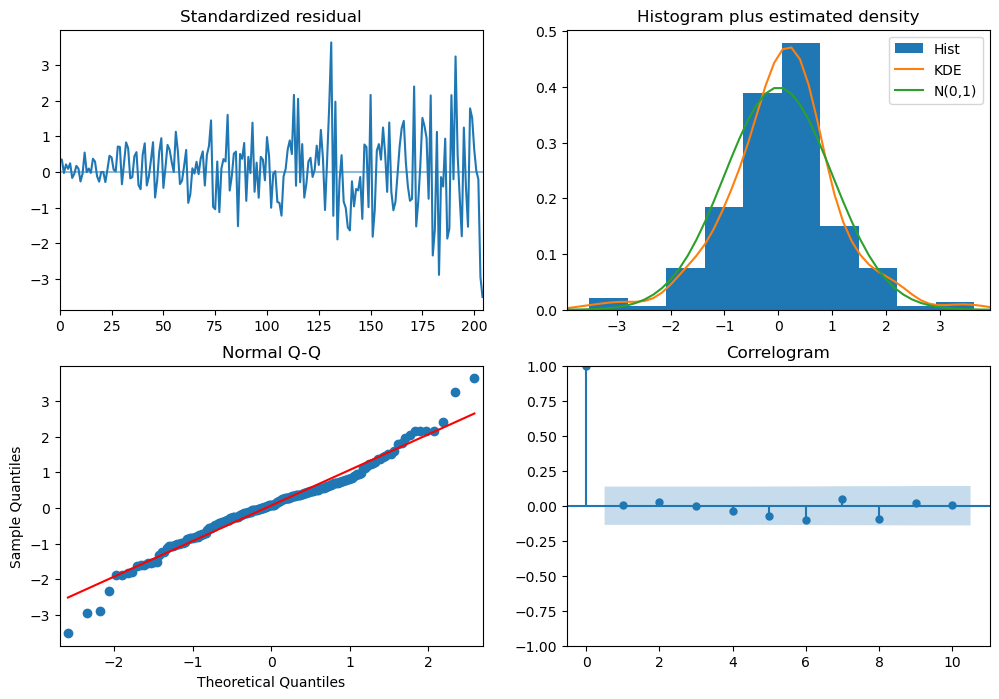

In [37]:
arima_m1.plot_diagnostics(figsize=(12, 8));

Finally, we assess the error on the test set. The out-of-sample performance is better than the naive methods. 

In [38]:
ts.rmse(test2.values, arima_m1.predict(n_periods=12))

1.9436924126507342

Let us proceed to make a plot of the predictions.

In [39]:
n_periods = 12
fc, confint = arima_m1.predict(n_periods=n_periods, return_conf_int=True)

ff = pd.Series(fc, index=test2.index)
lower_series = pd.Series(confint[:, 0], index=test2.index)
upper_series = pd.Series(confint[:, 1], index=test2.index)

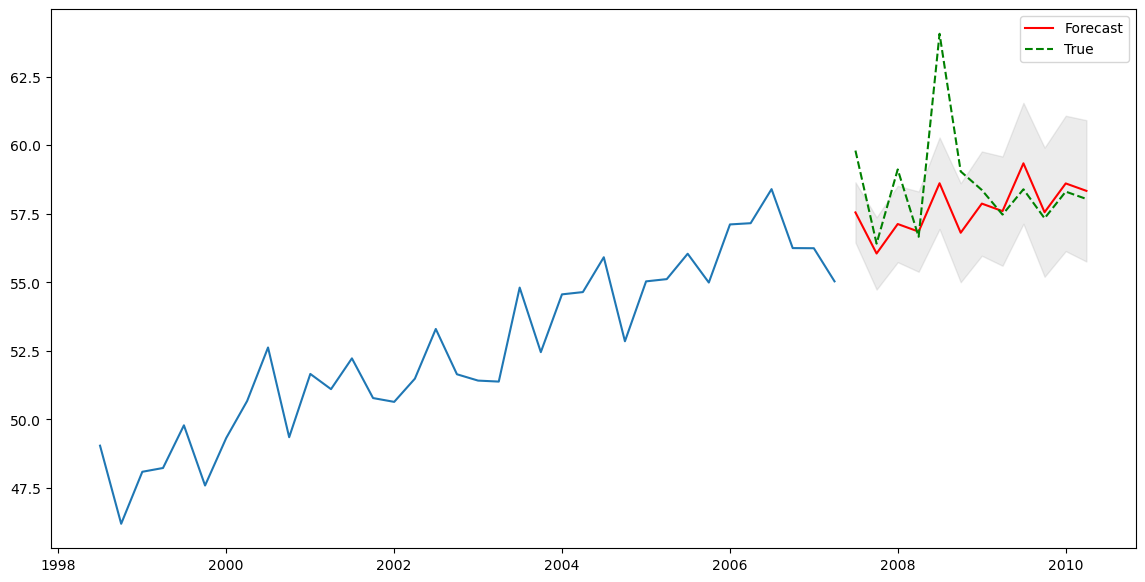

In [40]:
plt.figure(figsize=(14, 7))
plt.plot(train2[-36:])
plt.plot(ff, color='red', label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='gray', alpha=.15)
plt.plot(test2, 'g--', label='True')
plt.legend();

#### Exponential Smoothing Models (ETS)

ETS models are a new class of models, that define a time series process according to a set of state space equations:

\begin{eqnarray}
y_t &=& w' x_{t-1} + e_t \\
x_t &=& F x_{t-1} + g e_t
\end{eqnarray}

The unobserved **state** $x_t$ is usually a vector, and it typically contains information about
* the level of the process at time $t$.
* the seasonal effect at time $t$
* the trend or growth factor at time $t$.

All these parameters are updated at every point in time. For instance, the simplest ETS model (A,N,N), is one that assumes that there is only a level parameter, and that it is updated as a weighted average of the most recent levels:

\begin{eqnarray}
l_t &=& \alpha y_t + (1- \alpha)l_{t-1} \\
\hat{y}_{t+1} &=& l_t
\end{eqnarray}

The definition of the model is very flexible, and allows multiplicative growth, linear growth and damped terms in the model. All this, in addition to not requiring the assumption of stationarity!

Here is a full table of the additive models, followed by the multiplicative models:

![Additive ETS models](../figs/ets_add.png)

![Multiplicative ETS models](../figs/ets_mult.png)

Let us try one of the basic models, with just a slope, level and seasonal effect ETS(A,A,A), on the qau dataset.


In [41]:
ets_m1 = ExponentialSmoothing(train2.values, seasonal_periods=4, trend='add', seasonal='add')

ets_fit = ets_m1.fit()

In [42]:
ets_fit.summary()

Dep. Variable:,endog,No. Observations:,206
Model:,ExponentialSmoothing,SSE,64.907
Optimized:,True,AIC,-221.915
Trend:,Additive,BIC,-195.292
Seasonal:,Additive,AICC,-220.787
Seasonal Periods:,4,Date:,"Tue, 31 Oct 2023"
Box-Cox:,False,Time:,21:04:13
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6205894,alpha,True
smoothing_trend,3.3785e-11,beta,True


In [43]:
for tt in [None, 'add', 'mul']:
    print(f'trend component: {tt}')
    print('-----')
    for ss in [None, 'add', 'mul']:
        print(f'seasonal component: {ss}')
        ets_tmp = ExponentialSmoothing(train2.values, seasonal_periods=4, trend=tt, seasonal=ss)
        out_tmp = ets_tmp.fit()
        print(f'AIC is {out_tmp.aic:.4f}')
    print('-----\n-----')

trend component: None
-----
seasonal component: None
AIC is 194.0920
seasonal component: add
AIC is -170.2341
seasonal component: mul
AIC is -161.9721
-----
-----
trend component: add
-----
seasonal component: None
AIC is 132.4241
seasonal component: add
AIC is -221.9147
seasonal component: mul
AIC is -210.1923
-----
-----
trend component: mul
-----
seasonal component: None
AIC is 139.9307
seasonal component: add
AIC is -223.1679
seasonal component: mul
AIC is -197.4843
-----
-----


When we plot the individual components, we observe that the slope does not get updated. The $\beta$ parameter is practically 0. Consequently, the level keeps increasing at an almost constant rate.

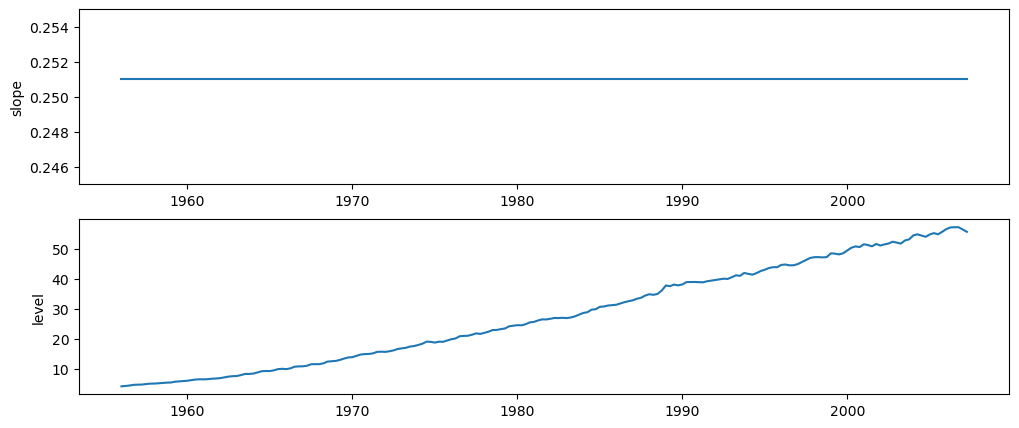

In [44]:
plt.subplot(211)
plt.plot(train2.index, ets_fit.trend, scaley=False)
plt.ylim(0.245, 0.255)
plt.ylabel('slope')

plt.subplot(212)
plt.plot(train2.index, ets_fit.level)
plt.ylabel('level');

Finally, let's take a look if the predictions on the test set are competitive with the automatic ARIMA model that was selected earlier. The forecasts are better than the naive ones, but not as good as the ARIMA. However, keep in mind that we are working with a single model; we should iterate over several ETS models and pick the best one in order to compare with the ARIMA model found.

In [45]:
ets_fc = ets_fit.forecast(steps=12)
ts.rmse(test2.values, ets_fc)

2.2368861857807474

In [46]:
out_fc = out_tmp.forecast(steps=12)
ts.rmse(test2.values, out_fc)

2.2666500175464686

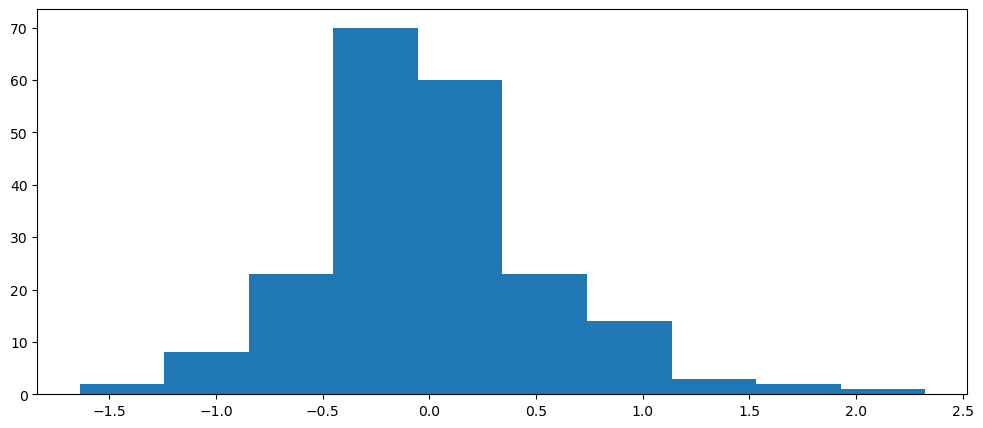

In [47]:
plt.hist(ets_fit.resid);

<StemContainer object of 3 artists>

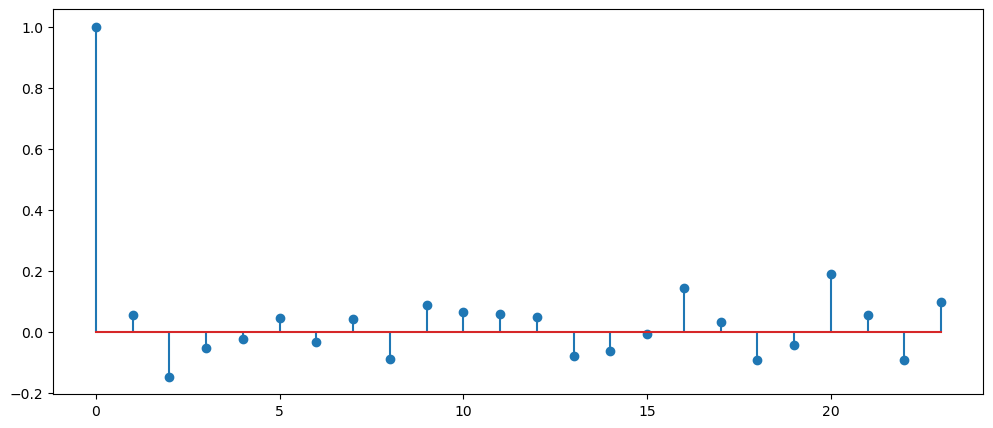

In [48]:
plt.stem(acf(ets_fit.resid))

<a id='references' ></a>
### 6. References and Summary
<a href=#top>(back to top)</a>

The main **tools** that we introduced this session are:
* matplotlib for plotting charts
* statsmodels for time series methods and models in Python

The main **techniques** that we introduced this session are:
* Time series exploratory techniques
* Automatic fitting and determination of ARIMA models.
* Fitting ETS models, another large class of possible models for time series forecasting
* Studying residuals

1. [Forecasting Principles and Practice](https://otexts.com/fpp3/): An online textbook by Rob Hyndman - an expert in Time Series Forecasting. It uses R code, not Python.
2. [Time Series Analysis with Python](https://www.machinelearningplus.com/time-series/time-series-analysis-python/): A very useful website for performing time series analysis with Python.
3. [Python statsmodels](https://www.statsmodels.org/stable/index.html): The documentation page for the `statsmodels` package that we use throughout the examples above.
4. Prohpet package